In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [43]:
data=pd.read_csv('../../data/00-raw-data/WC2022 rawdata.csv')
y=data["official"]
data

,created_at,source,author_id,conversation_id,Tweet Point,Follows,Likes,hash_tag,id,text,keyword,official,unofficial
0,2022-09-13T23:58:10.000Z,Twitter Web App,1447697889032122369,1569660725064499201,-0.2960,1324,594,qatar2022,1569837876229152770,@Dr_alhammadi_22 They are also the graves of t...,qatar2022,1,0
1,2022-09-13T23:31:59.000Z,Twitter for iPhone,2986480875,1569805328589389830,-0.4515,697325,2907,"qatar2022,fifaworldcup",1569831285656371200,@DolapoAina @FIFAWorldCup @qatarairways @aviat...,qatar2022,1,0
2,2022-09-13T23:20:24.000Z,Twitter for iPhone,3133369339,1569828372175360001,0.0000,465,177,"qatar2022,worldcup2022",1569828372175360001,If anyone knows anyone going to Qatar for the ...,qatar2022,1,0
3,2022-09-13T23:08:07.000Z,Twitter for iPhone,4701157281,1569825281577213954,0.0000,334,1524,"qatar2022,fifaworldcup",1569825281577213954,67 DAYS TO GO!! \n\n#Qatar2022 #FIFAWorldCup #...,qatar2022,1,0
4,2022-09-13T23:07:02.000Z,Twitter Web App,1529607541671358464,1569825006775058433,0.8475,760,1264,"qatar2022,worldcup2022",1569825006775058433,@AlSultanBeach Here is a map I made for World ...,qatar2022,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,2022-09-14T17:19:30.000Z,Twitter for iPhone,1559664387652214788,1566433056961044480,0.6697,188,38,NaN,1570099938226216960,@malzamaty For daily rent\nDuring the World Cu...,qatar world cup,0,1
7084,2022-09-14T17:19:15.000Z,Twitter for iPhone,1559664387652214788,1569861739625287681,0.6697,1735,989,NaN,1570099874951008258,@WWE @nikkita_wwe For daily rent\nDuring the W...,qatar world cup,0,1
7085,2022-09-14T17:18:59.000Z,Twitter Web App,1382067071996035085,1570099804591763456,0.9545,82,843,NaN,1570099804591763456,I have won a Gold medal by playing Qatar Airwa...,qatar world cup,0,1
7086,2022-09-14T17:18:56.000Z,Twitter for iPhone,1559664387652214788,1569861779706249216,0.6697,911,1547,NaN,1570099795133333507,@SportsCenter For daily rent\nDuring the World...,qatar world cup,0,1


In [44]:
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(data.text)
X = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out())

X

,00,000,001,005nnpbgn9,00am,00idtf4w6g,00jkkcpnpl,00pm,00svo0pjdt,01ay8yhhlb,...,𝙰𝚖𝚎𝚛𝚒𝚌𝚊𝚗𝚜,𝙰𝚜𝚜𝚎𝚖𝚋𝚕𝚎,𝙹𝙰𝙿𝙰𝙽,𝙻𝙾𝙽𝙶,𝚂𝙻𝙴𝙴𝚅𝙴,𝟏𝟖,𝟐𝟎,𝟐𝟎𝟐𝟐,𝟮𝟬𝟮𝟮,𝟯𝗿𝗱
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [46]:
# build and fit the model
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

In [47]:
#calculate the accuracy rate
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values,y_predict)

0.9418194640338505

In [48]:
#calculate the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cf=metrics.confusion_matrix(y_test.values, y_predict)
cf

array([[1668,  111],
       [  54, 1003]])

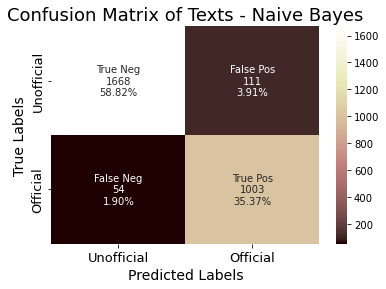

In [49]:
# make the  confusion Matirx visualize
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#plot the heatmap
fig=sns.heatmap(cf, annot=labels, fmt="", cmap='pink')
plt.title("Confusion Matrix of Texts - Naive Bayes",fontsize=18)
fig.set_xticklabels(["Unofficial","Official"],fontsize=13)
fig.set_yticklabels(["Unofficial","Official"],fontsize=13)
fig.set_xlabel("Predicted Labels",fontsize=14)
fig.set_ylabel("True Labels",fontsize=14)
plt.show()
heatmap = fig.get_figure()
# save the picture
heatmap.savefig("../../501-project-website/images/confusion_matirx_text_naive_bayes")


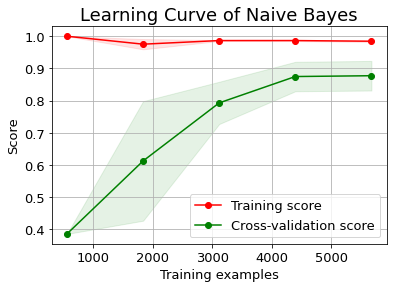

In [50]:
#plot the learning Curve
import scikitplot as skplt
probas_list=[y_predict]
clf_names=["Naive Bayes"]
a=skplt.estimators.plot_learning_curve(clf, X, y,text_fontsize=13)
plt.title("Learning Curve of Naive Bayes",fontsize=18)
plt.show()
curve=a.get_figure()
curve.savefig("../../501-project-website/images/learning_curve_text_naive_bayes")

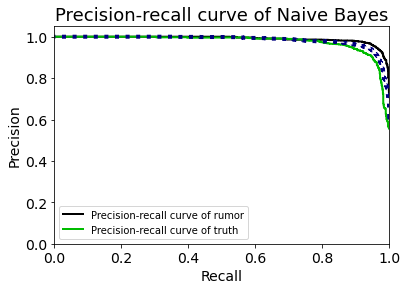

In [51]:
#plot the Precision-recall curve
skplt.metrics.plot_precision_recall(y_true=y_test, y_probas=predicted_probas,text_fontsize=14)
plt.legend(['Precision-recall curve of rumor',"Precision-recall curve of truth"])
plt.title("Precision-recall curve of Naive Bayes",fontsize=18)
plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.savefig("../../501-project-website/images/PR_curve_naive_bayes")